In [2]:
# Importing necessary libraries and loading the cardiovascular disease dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load disease disease dataset from UCI repository
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = df.dropna()
# Replace missing values represented with "?" with NaN
df = df.replace('?', np.nan)

# Convert columns with numeric data from string to float
df = df.astype(float)

# Replace NaN values with mean of column
df = df.fillna(df.mean())
print(df.head())
print(df.shape)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0     0.0  
1    2.0  3.0   3.0     2.0  
2    2.0  2.0   7.0     1.0  
3    3.0  0.0   3.0     0.0  
4    1.0  0.0   3.0     0.0  
(303, 14)


In [4]:
#dropping the target column to avoid bias
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['target'], axis=1))
print(X)

[[ 0.94872647  0.68620244 -2.25177456 ...  2.27457861 -0.72309499
   0.65581797]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  2.50385129
  -0.89852225]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  1.42820253
   1.17393137]
 ...
 [ 0.28381332  0.68620244  0.87798549 ...  0.64911323  0.35255377
   1.17393137]
 [ 0.28381332 -1.4572959  -1.20852121 ...  0.64911323  0.35255377
  -0.89852225]
 [-1.82174501  0.68620244 -0.16526786 ... -0.97635214  0.
  -0.89852225]]


In [21]:
#Using KMeans to check the cluster and data distribution
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)
print(labels)

[1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0
 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0
 1 1 0 1 1 0 0]


In [6]:
#label the data for suoervised learning model
labeled_data = pd.DataFrame({'patient_id': df.index, 'Label': labels})
print(labeled_data.head())
# print(labeled_data['Label'])

   patient_id  Label
0           0      1
1           1      1
2           2      1
3           3      0
4           4      0


In [7]:
#assigning the labels value to cluster column 
df['cluster'] = kmeans.labels_

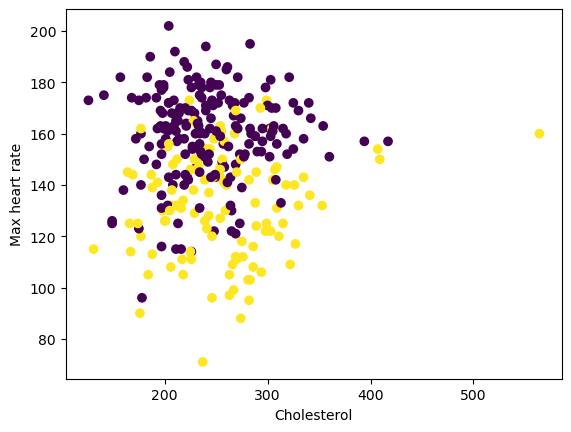

In [10]:
# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(df['chol'], df['thalach'], c=df['cluster'], cmap='viridis')
plt.xlabel('Cholesterol')
plt.ylabel('Max heart rate')
plt.show()

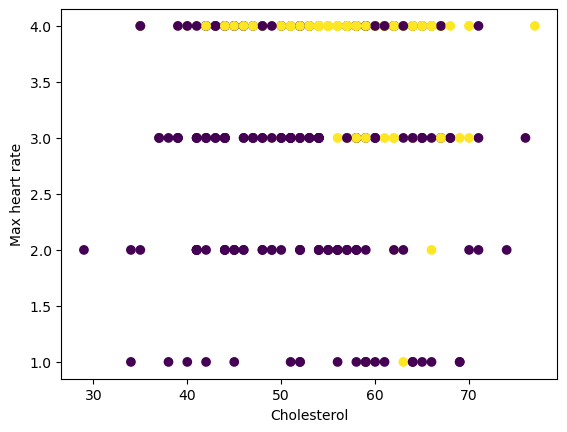

In [11]:
# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['cp'], c=df['cluster'], cmap='viridis')
plt.xlabel('Cholesterol')
plt.ylabel('Max heart rate')
plt.show()

## Supervised Learning

In [12]:
#importing required libraries for supervised learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [13]:
#splitting data set to train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), labeled_data.drop(['patient_id'],axis=1), test_size=0.2, random_state=0)

print(y_train)


     Label
74       0
153      1
64       1
296      1
287      0
..     ...
251      1
192      1
117      0
47       1
172      0

[242 rows x 1 columns]


In [14]:
#Checking multiple supervised models
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
# Multi-layer Perceptron classifier
neural_network = MLPClassifier(random_state=42)
neural_network.fit(X_train, y_train)
#random forest classifier
random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
random_forest.fit(X_train, y_train)

c:\Users\Chinmayee\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chinmayee\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Chinmayee\AppData\Local\Temp\ipykernel_6496\2730836553.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:

# Predicting the target variable on the testing set and calculating the accuracy
decision_tree_pred = decision_tree.predict(X_test)
neural_network_pred = neural_network.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

In [16]:
# Calculating the accuracy of different models
from sklearn.metrics import accuracy_score
decision_tree_acc = accuracy_score(y_test, decision_tree_pred)
neural_network_acc = accuracy_score(y_test, neural_network_pred)
random_forest_acc = accuracy_score(y_test, random_forest_pred)
# Comparing the accuracy of different models
print('Decision Tree Accuracy: {:.2f}%'.format(decision_tree_acc * 100))
print('Neural Network Accuracy: {:.2f}%'.format(neural_network_acc * 100))
print('Random Forest Accuracy: {:.2f}%'.format(random_forest_acc * 100))

Decision Tree Accuracy: 100.00%
Neural Network Accuracy: 100.00%
Random Forest Accuracy: 100.00%


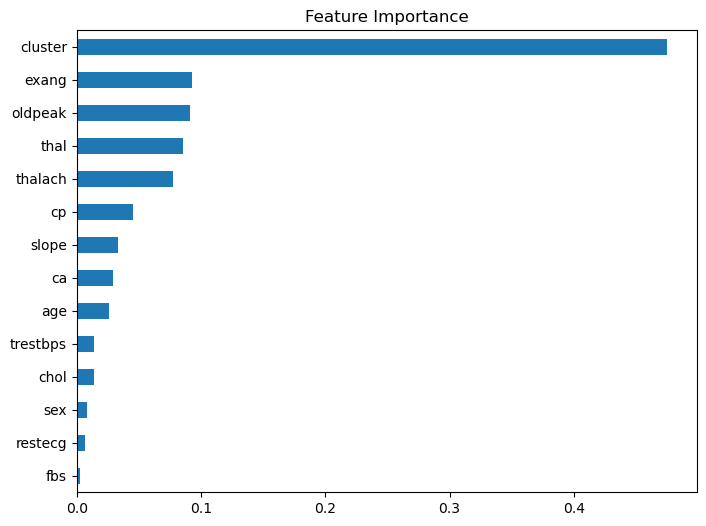

In [17]:
#score measures the reduction in impurity when splitting on a particular variable in random forest
importances = pd.Series(random_forest.feature_importances_, index=df.drop(['target'], axis=1).columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.show()

In [18]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, decision_tree_pred)


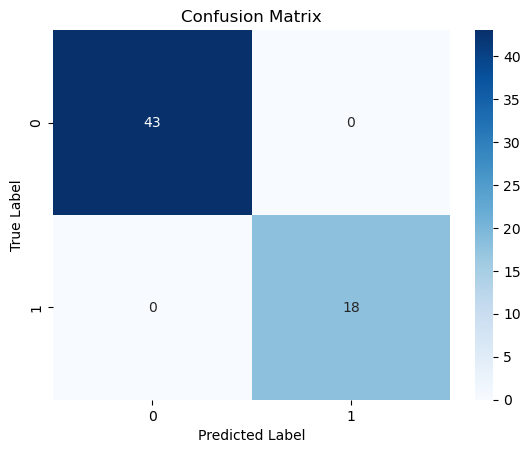

In [19]:
# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()